# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Develop a Predictive Model: Construct a regression model to forecast the selling price of used cars, with 'price' as the target variable.

Identify Key Predictors: Analyze the dataset to determine which features (like 'year', 'mileage', 'brand', 'model', etc.) most significantly affect the used car prices.

Data Processing: Clean and preprocess the data, including handling missing values, encoding categorical variables, and normalizing data, to prepare for effective model training.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline



In [2]:
data = pd.read_csv('data/vehicles.csv')
data

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### NaN value ratio

In [4]:
missing_values_count = data.isnull().sum()
total_rows = len(data)
missing_percentage = (missing_values_count / total_rows) * 100
print(missing_percentage)


id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


### Identifying continuous and categorical columns

In [5]:
continuous_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns

continuous_columns, categorical_columns

(Index(['id', 'price', 'year', 'odometer'], dtype='object'),
 Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
        'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
        'paint_color', 'state'],
       dtype='object'))

### Counting the number of unique values in each categorical feature

In [6]:

unique_values_count =data[categorical_columns].nunique()
numerical_columns =data.select_dtypes(include=['int64', 'float64']).columns

unique_values_count

region             404
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

### IQR for potential outliers in 'price'

In [7]:
car_prices = data['price']

Q1 = car_prices.quantile(0.25)
Q3 = car_prices.quantile(0.99)
IQR = Q3 - Q1
print("Potential outliers are values < {} or > {}".format(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR))

Potential outliers are values < -85742.5 or > 158637.5


### Visualization for 'price' column

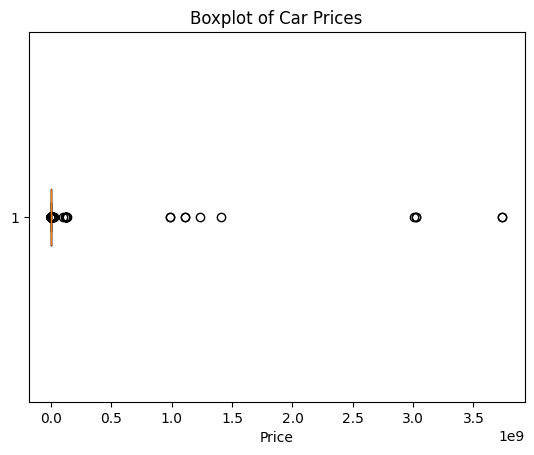

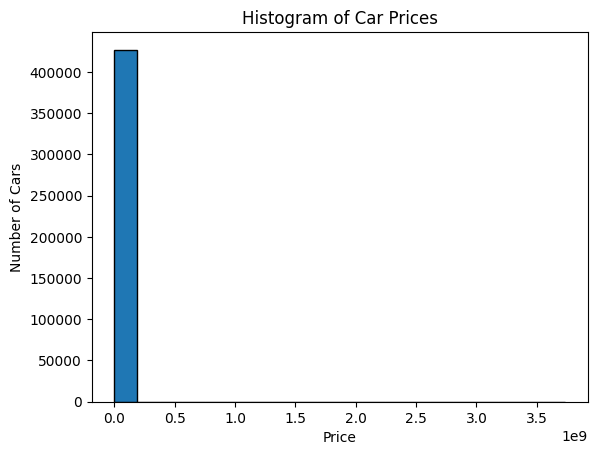

In [8]:
plt.boxplot(car_prices, vert=False)
plt.title("Boxplot of Car Prices")
plt.xlabel("Price")
plt.show()

plt.hist(car_prices, bins=20, edgecolor='black')
plt.title("Histogram of Car Prices")
plt.xlabel("Price")
plt.ylabel("Number of Cars")
plt.show()

### Potential Outliers in 'odometer'

In [9]:
car_prices = data['odometer']

Q1 = car_prices.quantile(0.25)
Q3 = car_prices.quantile(0.99)
IQR = Q3 - Q1
print("Potential outliers are values < {} or > {}".format(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR))

Potential outliers are values < -325740.0 or > 643444.0


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Drop high cardinality features

model, type, region, state, paint_color, manufacturer

These features have a relatively high number of unique values which will increase model complexity and computation time.


In [10]:
high_cardinality_features= ['model', 'state', 'region', 'manufacturer', 'type', 'paint_color']
data.drop(columns=high_cardinality_features, axis=1, inplace=True)

### Drop irrelevant features

id, VIN

ID and Vin features are less likely to have a significant impact on the price.

In [11]:
irelevant_features= ['id','VIN']
data.drop(columns=irelevant_features, axis=1, inplace=True)

### Drop NaN Rows


In [12]:
data.dropna(inplace=True)

### Convert the 'year' column to an integer data type

In [13]:
data['year'] = data['year'].astype(int)

### Filter out rows with outlier prices.

In [14]:

data = data[data['price'] <= 140148]
data = data[data['price'] > 0]

### Filter out rows with outlier odometer.

In [15]:
data = data[data['odometer'] > 1000]
data = data[data['odometer'] < 643444]

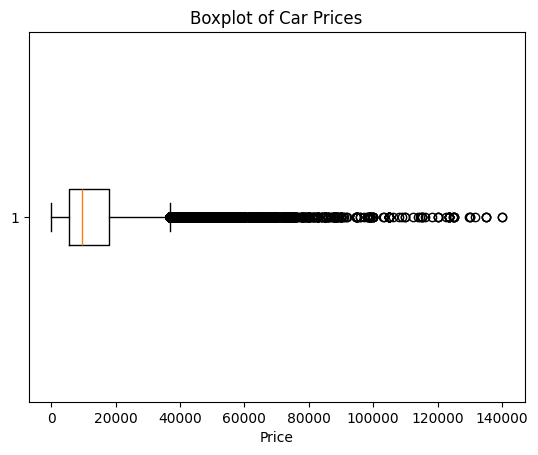

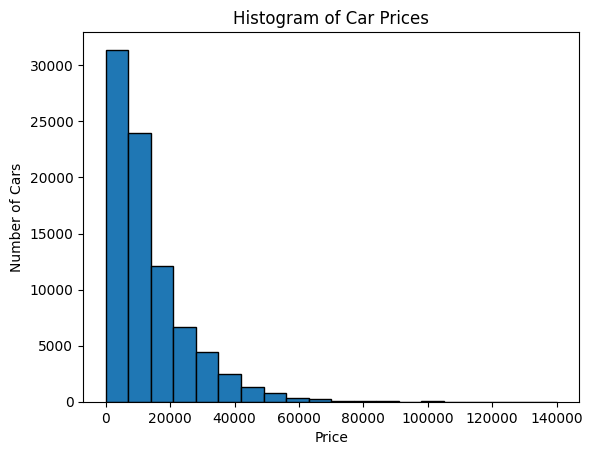

In [16]:
plt.boxplot(data['price'], vert=False)
plt.title("Boxplot of Car Prices")
plt.xlabel("Price")
plt.show()

plt.hist(data['price'], bins=20, edgecolor='black')
plt.title("Histogram of Car Prices")
plt.xlabel("Price")
plt.ylabel("Number of Cars")
plt.show()

### Apply one-hot encoding to categorical features.

In [17]:
columns_to_encode = ['condition', 'cylinders', 'fuel', 'title_status',
                     'transmission', 'drive', 'size']

data= pd.get_dummies(data, columns=columns_to_encode)
data

,price,year,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_10 cylinders,...,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,size_compact,size_full-size,size_mid-size,size_sub-compact
31,15000,2013,128000.0,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
55,19900,2004,88000.0,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
59,14000,2012,95000.0,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False
65,22500,2001,144700.0,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
73,15000,2017,90000.0,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,18000,2005,130000.0,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
426809,18000,1990,114400.0,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
426831,9800,1985,115000.0,False,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,True
426833,6800,1997,69550.0,False,False,True,False,False,False,False,...,True,False,False,False,False,True,True,False,False,False


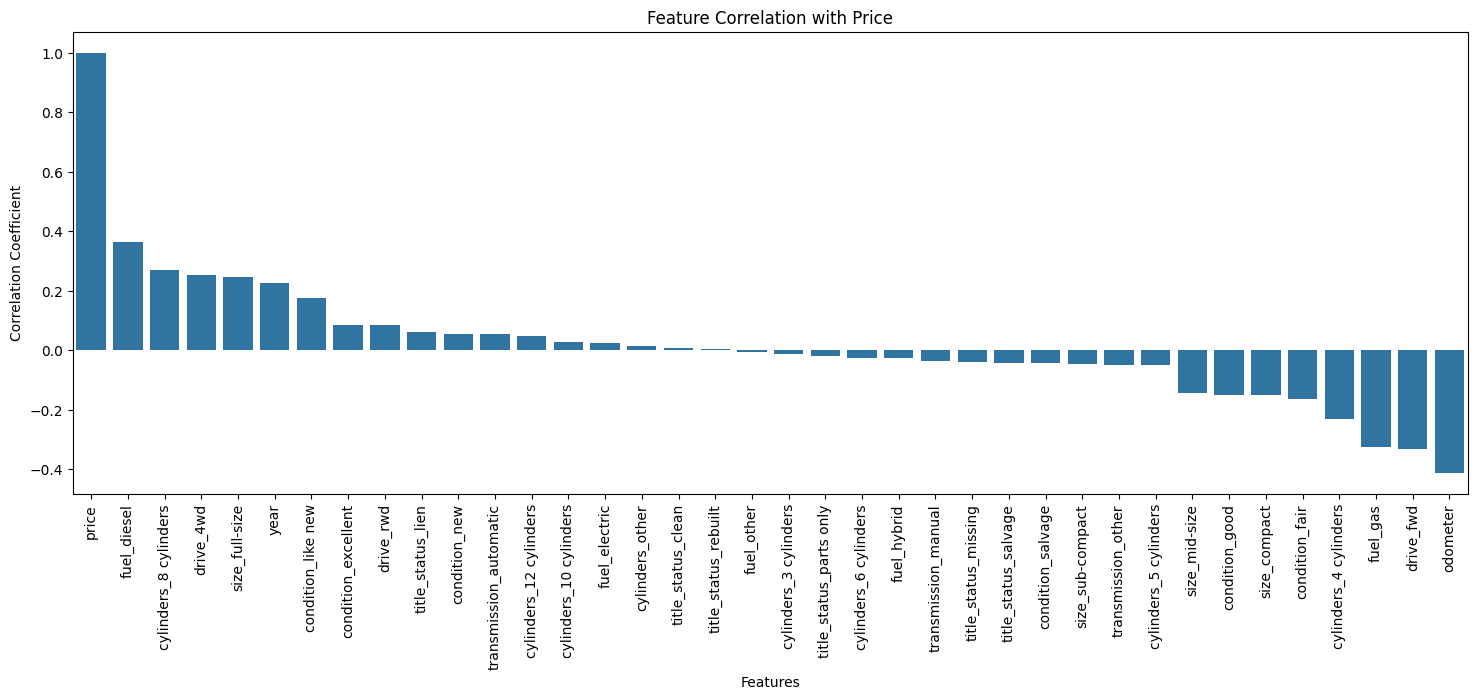

In [18]:
correlation_matrix = data.corr()

target_correlation = correlation_matrix['price'].sort_values(ascending=False)

plt.figure(figsize=(18, 6))
sns.barplot(x=target_correlation.index, y=target_correlation.values)
plt.xticks(rotation=90)
plt.title('Feature Correlation with Price')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis = 1), np.log1p(data.price),
                                                   random_state=42, test_size = 0.3)

data.shape

(84019, 38)

### Ridge Model


In [20]:
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
ridge = Ridge()
scaler = StandardScaler()

pipeline = make_pipeline(scaler, ridge)

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)
train_preds = grid.predict(X_train)
test_preds = grid.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
best_alpha = grid.best_params_
r2 = r2_score(y_test, test_preds)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f"R-squared (R²): {r2}")
print(f'Best Alpha: {best_alpha}')


Train MSE: 1.0497792838163884
Test MSE: 1.0888738864347254
R-squared (R²): 0.3526084022624607
Best Alpha: {'ridge__alpha': 100.0}


### Linear Model

1. Select best number of features

In [22]:
lr = LinearRegression()
best_score = float('inf')
best_n_features = 0
scores_map = {}
for n_features in range(1, 21):
    sfs = SequentialFeatureSelector(lr, n_features_to_select=n_features)

    sfs.fit(X_train, y_train)
    X_selected = sfs.transform(X_train)

    scores = cross_val_score(lr, X_selected, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = -np.mean(scores)

    scores_map[n_features] = mean_score

print(f"{scores_map}")

{1: 1.453553394373846}


MSE from 1 to 21 features

In [101]:
{1: 1.453553394373846, 2: 1.3359121347748744, 3: 1.2416580678632614, 4: 1.1828490970958456, 5: 1.1470344836494282}
{6: 1.1227419322933043, 7: 1.1008575423458387, 8: 1.0851013647664065, 9: 1.0714125925067994, 10: 1.0670452823463412}
{11: 1.063387388014295, 12: 1.059831684144791, 13: 1.0575930335106645, 14: 1.0565385441243489}
{15: 1.0555752332694, 16: 1.0547371366491667, 17: 1.0539711029031573, 18: 1.0532093379496963, 19: 1.052766947442167, 20: 1.05238468845721}


{15: 1.0555752332694,
 16: 1.0547371366491667,
 17: 1.0539711029031573,
 18: 1.0532093379496963,
 19: 1.052766947442167,
 20: 1.05238468845721}

In [23]:
lr = LinearRegression()
sfs = SequentialFeatureSelector(lr, n_features_to_select=10)
sfs.fit(X_train, y_train)

X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

lr.fit(X_train_sfs, y_train)

y_train_pred = lr.predict(X_train_sfs)
y_test_pred = lr.predict(X_test_sfs)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"R-squared: {test_r2}")

Training MSE: 1.0655303421448428
Testing MSE: 1.1001887661168033
R-squared: 0.3458811236245525


### Polynomial Regression

1. Degree 2

In [24]:
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

linear_regression = LinearRegression()

pipeline = Pipeline([
    ("polynomial_features", poly_features),
    ("linear_regression", linear_regression)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")
print(f"mse: {mse}")
print(f"R-squared: {test_r2}")

RMSE: 0.9346719717787828
mse: 0.8736116948288378
R-squared: 0.3458811236245525


2. Degree 3

In [25]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

selector = SelectFromModel(rf, threshold="median")  # Selects features with importance greater than the median
selector.fit(X_train, y_train)

X_train_reduced = selector.transform(X_train)
X_test_reduced = selector.transform(X_test)

In [26]:
degree = 3
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

linear_regression = LinearRegression()

pipeline = Pipeline([
    ("polynomial_features", poly_features),
    ("linear_regression", linear_regression)
])

pipeline.fit(X_train_reduced, y_train)

y_pred = pipeline.predict(X_test_reduced)
mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"mse: {mse}")
print(f"Testing R-squared: {test_r2}")

mse: 0.8061426602114113
Testing R-squared: 0.3458811236245525


### Random Forest Regressor 

In [27]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': data.drop('price', axis=1).columns, 'Importance': feature_importances})

importance_sorted = importance_df.sort_values(by='Importance', ascending=False)

importance_sorted, np.sqrt(mse)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mse: {mse_test}")
print(f"Testing R-squared: {r2}")

mse: 0.5231132883476177
Testing R-squared: 0.6889822120264394


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Model Performance

1. Ridge Model

MSE: 1.0888738864347254

R-squared (R²): 0.3526084022624607

Best Alpha: {'ridge__alpha': 100.0}

2. Linear Model

Number of feature: 10

MSE: 1.1001887661168033

R-squared: 0.3458811236245525

3. Polinomial Linear Model (degree = 2)

mse: 0.8736116948288378

R-squared: 0.3439520702338288

4. Polinomial Linear Moel (degree =3) after RandomForestRegressor


mse: 0.8061426602114113

R-squared: 0.3458811236245525

{'odometer': -5.443772193319512e-06, 'year': 0.017133054061366164, 'condition_like new': 0.2981165420453726, 'cylinders_12 cylinders': -0.35991952084328527, 'cylinders_10 cylinders': -0.4189374902107315, 'condition_excellent': -0.8125067695482081, 'condition_new': 0.8350027782659256, 'condition_fair': -1.16213249447784, 'condition_good': -1.2949423170064656, 'condition_salvage': -4.088052740309024}
{'title_status_rebuilt': -0.000560313589114884, 'size_mid-size': -0.0011470178684357482, 'condition_new': 0.005286254015745771, 'fuel_electric': 0.005606140625804883, 'title_status_clean': 0.006405815660871582, 'cylinders_3 cylinders': 0.008617697107363721, 'fuel_other': -0.008796181016322843, 'title_status_salvage': -0.009248001206879394, 'size_sub-compact': -0.010536721267990915, 'cylinders_5 cylinders': -0.014025857826498008, 'fuel_hybrid': -0.014285492466774508, 'condition_good': -0.016226169830293565, 'cylinders_12 cylinders': 0.01963329981037217, 'title_status_lien': 0.0225559867787190

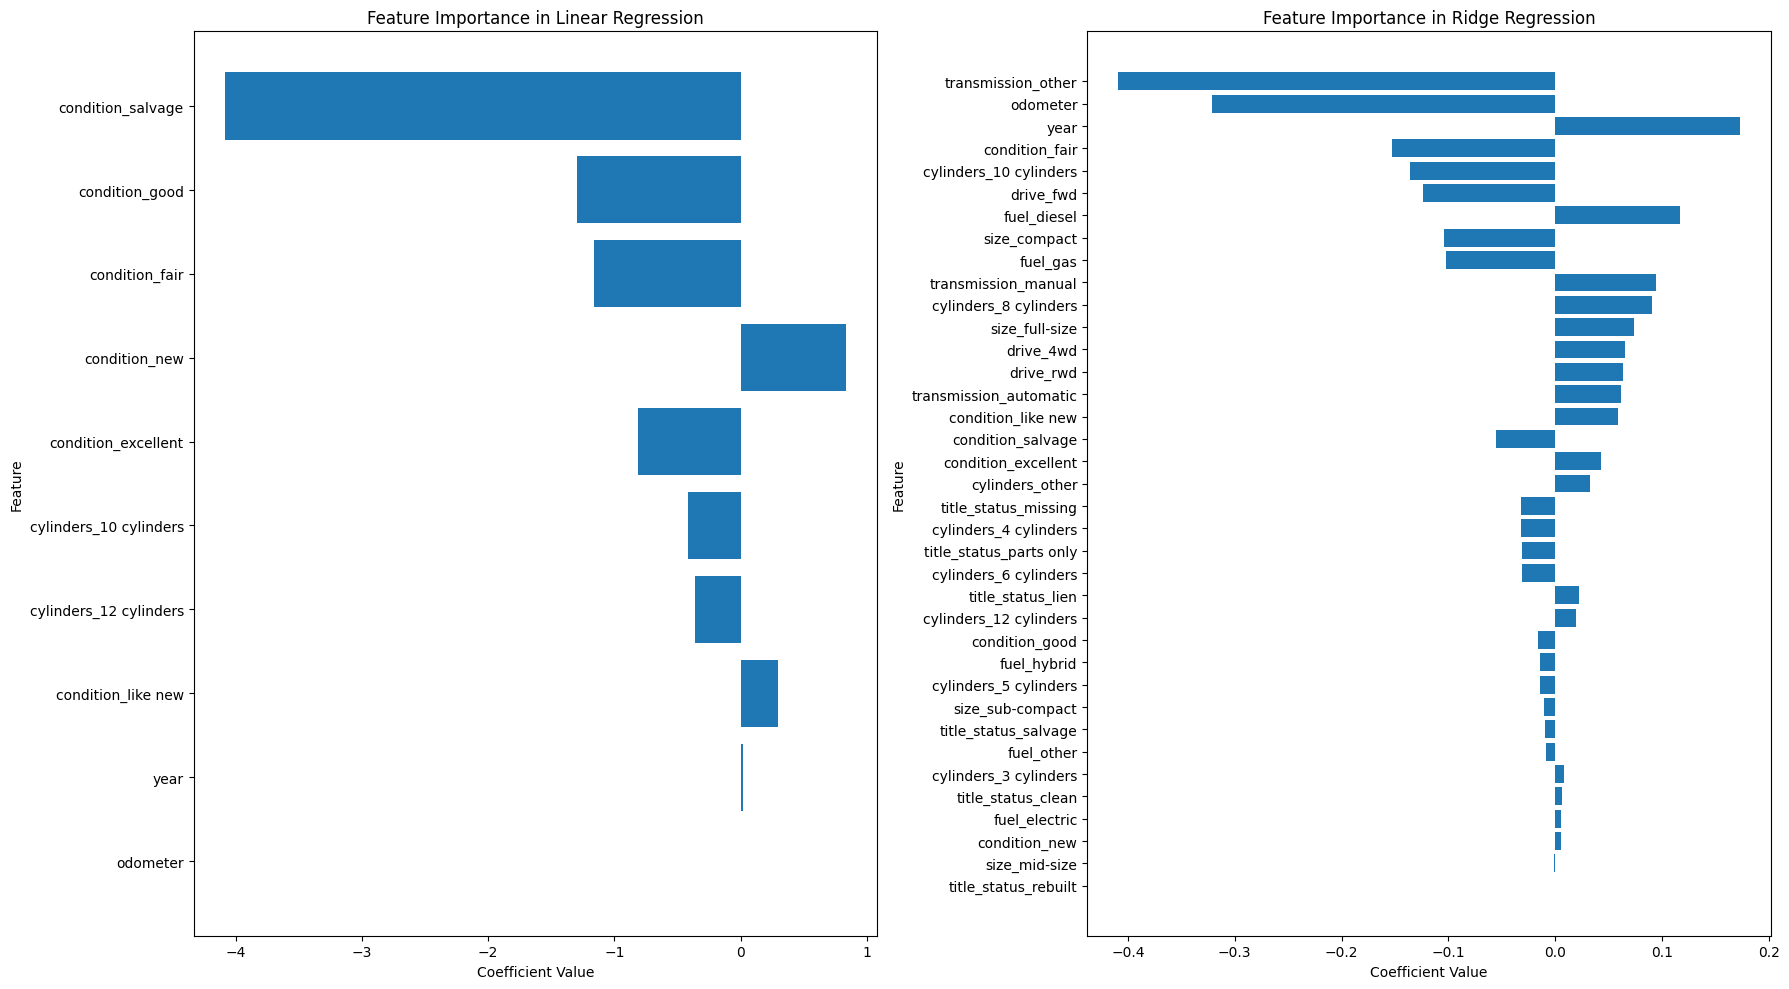

In [28]:

def plot_feature_importance(coefficients, feature_names, title, ax):
    indices = np.argsort(np.abs(coefficients))
    features_sorted = np.array(feature_names)[indices]
    coefficients_sorted = coefficients[indices]
    feature_coef_dict = dict(zip(features_sorted, coefficients_sorted))

    ax.barh(features_sorted, coefficients_sorted)
    ax.set_title(title)
    ax.set_xlabel('Coefficient Value')
    ax.set_ylabel('Feature')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))

plot_feature_importance(lr.coef_, data.drop('price',axis=1).columns, 'Feature Importance in Linear Regression', axes[0])

plot_feature_importance(grid.best_estimator_.named_steps['ridge'].coef_, data.drop('price',axis=1).columns, 'Feature Importance in Ridge Regression', axes[1])

plt.tight_layout()
plt.show()


4. Random Forest Regressor

mse: 0.5231132883476177

R-squared: 0.6889822120264394

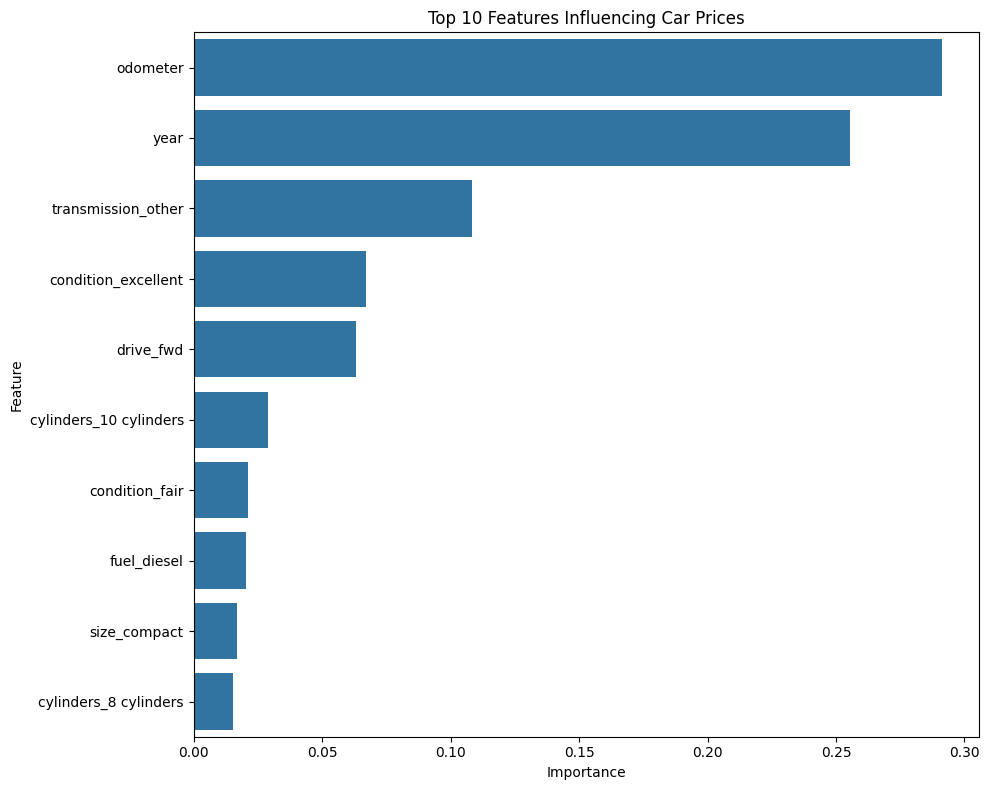

In [29]:

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_sorted.head(10))
plt.title('Top 10 Features Influencing Car Prices')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

### Best Performing Model
After comparing four different regression models, the Random Forest Regressor appears to be the most effective model.
This assessment is based on its performance metrics: it achieved a Mean Squared Error (MSE) of 0.52 and an R² score of 0.68.

### Positive Influences:
* Higher Year (Newer Models): Both dictionaries show positive coefficients for 'year', indicating newer cars are more desirable or valuable.

* Good Condition: Features like 'condition_like new', 'condition_new', and 'condition_excellent' have positive coefficients, suggesting cars in better condition are more likely to sell.

* Fuel Type: 'fuel_diesel', 'fuel_electric' have positive impacts.

* Transmission and Drive: 'transmission_manual', 'transmission_automatic', 'drive_4wd', 'drive_rwd' are favorable.

* Car Size: 'size_full-size' is positive, indicating a preference for larger vehicles.


### Negative Influences:
* High Odometer Readings: Negative coefficients for 'odometer' suggest that higher mileage reduces a car's desirability.

* Poor Condition: 'condition_fair', 'condition_salvage', and 'condition_good' negatively impact sale prospects.

* Cylinders: Higher numbers like 'cylinders_10 cylinders', 'cylinders_12 cylinders' are negative, possibly due to higher fuel consumption or maintenance costs.

* Title Status: Negative impacts from 'title_status_rebuilt', 'title_status_salvage'.

* Car Size: Smaller sizes like 'size_sub-compact', 'size_compact' are less desirable.

* Transmission and Drive: 'transmission_other', 'drive_fwd' show negative coefficients.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Recommendations for Used Car Dealers:

* Focus on Newer, Well-Maintained Vehicles: Prioritize acquiring and selling newer models in excellent or like-new condition.

* Promote Specific Features: Highlight diesel or electric fuel types, and 4WD or RWD drive types in marketing and sales pitches.

* Be Cautious with High Odometer Vehicles: Vehicles with high mileage should be priced competitively or possibly avoided.

* Avoid Cars in Poor Condition: Vehicles with salvage titles, fair or salvage condition should be traded cautiously.

* Selection of Vehicle Types: Prefer stocking up on full-size vehicles and be cautious with compact or sub-compact cars.